<a href="https://colab.research.google.com/github/BillWorstell/DiffDRR/blob/main/diffDRRv4Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install

install the latest stable release

https://github.com/eigenvivek/DiffDRR/tree/main

In [1]:
pip install diffdrr

The following minimal example specifies the geometry of the projectional radiograph imaging system and traces rays through a CT volume:

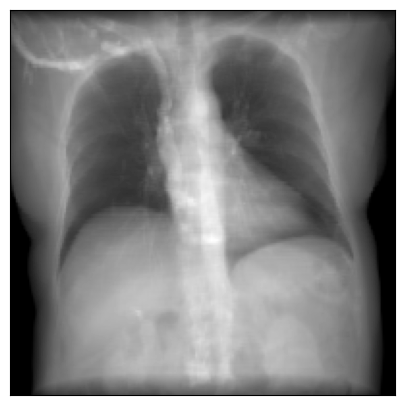

In [2]:
import matplotlib.pyplot as plt
import torch

from diffdrr.drr import DRR
from diffdrr.data import load_example_ct
from diffdrr.visualization import plot_drr

# Read in the volume and get its origin and spacing in world coordinates
subject = load_example_ct()

# Initialize the DRR module for generating synthetic X-rays
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
drr = DRR(
    subject,     # An object storing the CT volume, origin, and voxel spacing
    sdd=1020.0,  # Source-to-detector distance (i.e., focal length)
    height=200,  # Image height (if width is not provided, the generated DRR is square)
    delx=2.0,    # Pixel spacing (in mm)
).to(device)

# Set the camera pose with rotations (yaw, pitch, roll) and translations (x, y, z)
rotations = torch.tensor([[0.0, 0.0, 0.0]], device=device)
translations = torch.tensor([[0.0, 850.0, 0.0]], device=device)

# 📸 Also note that DiffDRR can take many representations of SO(3) 📸
# For example, quaternions, rotation matrix, axis-angle, etc...
img = drr(rotations, translations, parameterization="euler_angles", convention="ZXY")
plot_drr(img, ticks=False)
plt.show()

# Generate a specified DRR

In [3]:
!pip install icecream
from icecream import ic

ic| bx: -0.0
ic| by: 1020.0
ic| bz: 0.0


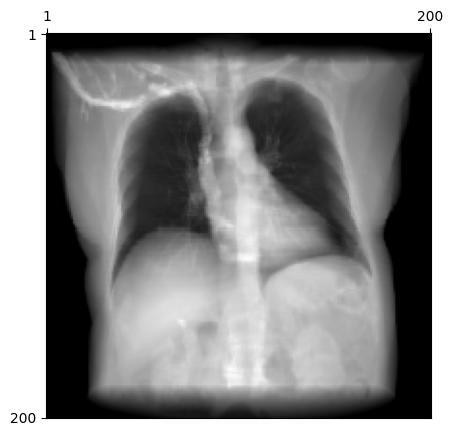

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
from tqdm import tqdm

from diffdrr.data import load_example_ct
from diffdrr.drr import DRR
from diffdrr.visualization import plot_drr

# Make the ground truth X-ray
SDD = 900.0
HEIGHT = 200
DELX = 2.0

bR = 1020.
beta=np.zeros(1)
alpha=np.zeros(1)
bx = -bR * np.cos(beta[0]) * np.sin(alpha[0])
by = bR * np.cos(beta[0]) * np.cos(alpha[0])
bz = bR * np.sin(beta[0])
ic(bx)
ic(by)
ic(bz)


subject = load_example_ct()
true_params = {
    "sdr": 1020.0,
    "alpha": 0.,
    "beta": 0.,
    "gamma": 0.0,
    "bx": 0.0,
    "by": 850.,
    "bz": 0.,
}
device = "cuda" if torch.cuda.is_available() else "cpu"

drr = DRR(subject, sdd=SDD, height=HEIGHT, delx=DELX).to(device)
rotations = torch.tensor(
    [
        [
            true_params["alpha"],
            true_params["beta"],
            true_params["gamma"],
        ]
    ]
).to(device)
translations = torch.tensor(
    [
        [
            true_params["bx"],
            true_params["by"],
            true_params["bz"],
        ]
    ]
).to(device)
ground_truth = drr(
    rotations,
    translations,
    parameterization="euler_angles",
    convention="ZXY",
)

plot_drr(ground_truth)
plt.show()

# Load Multiple Pinhole Camera Geometry

In [5]:
from google.colab import drive
from openpyxl import load_workbook
import numpy as np

!pip install icecream
from icecream import ic

# Mount Google Drive
drive.mount('/content/drive')

# Path to the spreadsheet containing the camera geometry specifications
spreadsheet_path = '/content/drive/MyDrive/SPECTGeometry/MDSL.excel80M10RFR.cut-plate.008.150roi.2.30pin.105ellipse.xlsx'

# Load the workbook and select the appropriate worksheet
wb = load_workbook(filename=spreadsheet_path, data_only=True)
wb.active = 1  # Assuming the relevant sheet is the second one (index 1)
ws = wb.active

# Read lcoll values from the spreadsheet
lcoll = np.array([ws.cell(row=i, column=7).value for i in range(3, 83)])
vsdr = 5. * lcoll  # Example operation on lcoll values

# Read alpha and beta values from the spreadsheet (in radians)
alpha = [ws.cell(row=i, column=22).value - (np.pi/2.) for i in range(3, 83)]
beta = [ws.cell(row=i, column=23).value for i in range(3, 83)]

# Display vsdr, alpha, and beta for debugging
ic(vsdr[0])
ic(alpha[0])
ic(beta[0])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


ic| vsdr[0]: 445.3510308
ic| alpha[0]: -1.3220133379948966
ic| beta[0]: -0.2403169548


-0.2403169548

# Generate camera 0 DRR

ic| true_params: {'alpha': -1.3220133379948966,
                  'beta': -0.2403169548,
                  'bx': 0.0,
                  'by': 445.3510308,
                  'bz': 0.0,
                  'gamma': 0.0,
                  'sdr': 890.7020616}


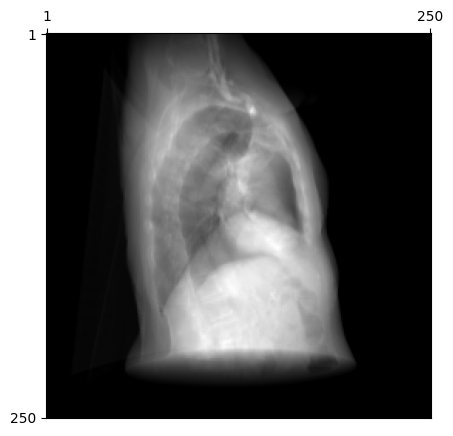

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
from tqdm import tqdm

from diffdrr.data import load_example_ct
from diffdrr.drr import DRR
from diffdrr.visualization import plot_drr

# Make the ground truth X-ray
SDD = float(2.*vsdr[0])
HEIGHT = 250
DELX = 4.0

subject = load_example_ct()
true_params = {
    "sdr": SDD,
    "alpha": alpha[0],
    "beta": beta[0],
    "gamma": 0.0,
    "bx": 0.,
    "by": float(vsdr[0]),
    "bz": 0.,
}
ic(true_params)
device = "cuda" if torch.cuda.is_available() else "cpu"

drr = DRR(subject, sdd=SDD, height=HEIGHT, delx=DELX).to(device)
rotations = torch.tensor(
    [
        [
            true_params["alpha"],
            true_params["beta"],
            true_params["gamma"],
        ]
    ]
).to(device)
translations = torch.tensor(
    [
        [
            true_params["bx"],
            true_params["by"],
            true_params["bz"],
        ]
    ]
).to(device)
ground_truth0 = drr(
    rotations,
    translations,
    parameterization="euler_angles",
    convention="ZXY",
)

plot_drr(ground_truth0)
plt.show()

Generate camera 60 DRR

ic| true_params: {'alpha': -1.3220133379948966,
                  'beta': 0.2403169548,
                  'bx': 0.0,
                  'by': 445.3510308,
                  'bz': 0.0,
                  'gamma': 0.0,
                  'sdr': 890.7020616}


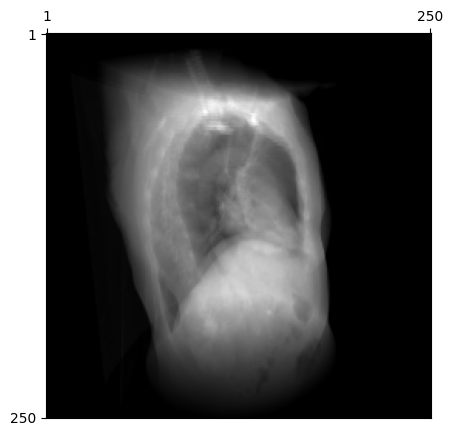

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
from tqdm import tqdm

from diffdrr.data import load_example_ct
from diffdrr.drr import DRR
from diffdrr.visualization import plot_drr

# Make the ground truth X-ray
SDD = float(2.*vsdr[60])
HEIGHT = 250
DELX = 4.0

subject = load_example_ct()
true_params = {
    "sdr": SDD,
    "alpha": alpha[60],
    "beta": beta[60],
    "gamma": 0.0,
    "bx": 0.,
    "by": float(vsdr[60]),
    "bz": 0.,
}
ic(true_params)
device = "cuda" if torch.cuda.is_available() else "cpu"

drr60 = DRR(subject, sdd=SDD, height=HEIGHT, delx=DELX).to(device)
rotations = torch.tensor(
    [
        [
            true_params["alpha"],
            true_params["beta"],
            true_params["gamma"],
        ]
    ]
).to(device)
translations = torch.tensor(
    [
        [
            true_params["bx"],
            true_params["by"],
            true_params["bz"],
        ]
    ]
).to(device)
ground_truth60 = drr60(
    rotations,
    translations,
    parameterization="euler_angles",
    convention="ZXY",
)

plot_drr(ground_truth60)
plt.show()

Generate camera 30 DRR

ic| true_params: {'alpha': 1.0598916132051035,
                  'beta': -0.1220143035,
                  'bx': 0.0,
                  'by': 284.780628,
                  'bz': 0.0,
                  'gamma': 0.0,
                  'sdr': 569.561256}


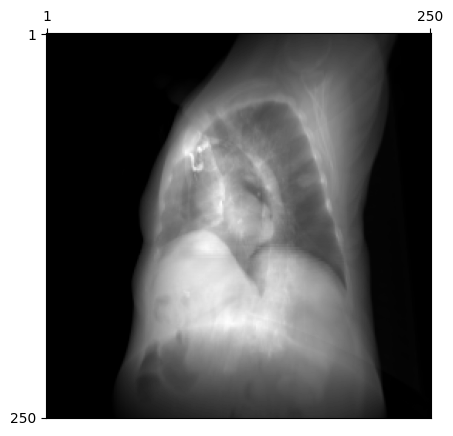

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
from tqdm import tqdm

from diffdrr.data import load_example_ct
from diffdrr.drr import DRR
from diffdrr.visualization import plot_drr

icamera=30

# Make the ground truth X-ray
SDD = float(2.*vsdr[icamera])
HEIGHT = 250
DELX = 4.0

subject = load_example_ct()
true_params = {
    "sdr": SDD,
    "alpha": alpha[icamera],
    "beta": beta[icamera],
    "gamma": 0.0,
    "bx": 0.,
    "by": float(vsdr[icamera]),
    "bz": 0.,
}
ic(true_params)
device = "cuda" if torch.cuda.is_available() else "cpu"

drr30 = DRR(subject, sdd=SDD, height=HEIGHT, delx=DELX).to(device)
rotations = torch.tensor(
    [
        [
            true_params["alpha"],
            true_params["beta"],
            true_params["gamma"],
        ]
    ]
).to(device)
translations = torch.tensor(
    [
        [
            true_params["bx"],
            true_params["by"],
            true_params["bz"],
        ]
    ]
).to(device)
ground_truth30 = drr30(
    rotations,
    translations,
    parameterization="euler_angles",
    convention="ZXY",
)

plot_drr(ground_truth30)
plt.show()